In [4]:
%load_ext autoreload
import subprocess
import numpy as np
import numpy.random as npr
from OSim import object
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Ellipse
import subprocess
from ipywidgets import interact

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


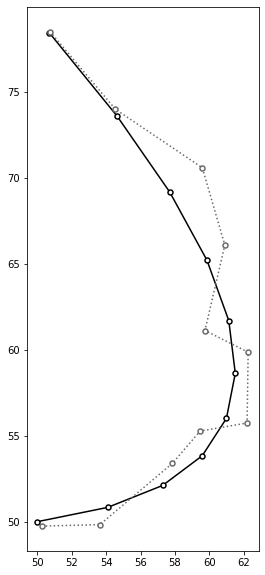

In [37]:
%autoreload 2
timesteps = 10
speed = 5
accel = 1*1
ellipseScaling = 1


o1 = object("1", 50, 50)
# o1.move(timesteps, speed)
o1.curve(timesteps, speed, accel)
meas = o1.measure()
dir = [d*speed for d in o1.direction]

with open('dir.txt', 'w') as f:
    f.write(str(dir))

    
with open('Xpos.txt', 'w') as f:
    f.writelines(np.array2string(meas[0], separator=',', suppress_small=True))


with open('Ypos.txt', 'w') as f:
    f.writelines(np.array2string(meas[1], separator=',', suppress_small=True))

plt.rcParams["figure.figsize"] = (10,10)

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})

plt.gca().set_aspect('equal', adjustable='box')

# plt.plot(o1.XPosList, o1.YPosList, 'b')
# plt.plot(meas[0], meas[1], 'r')
# plt.plot(o1.XPosList, o1.YPosList, 'b.', markersize=6)
# plt.plot(meas[0], meas[1], 'r.', markersize=6)

plt.plot(o1.XPosList, o1.YPosList, 'black')
plt.plot(meas[0], meas[1], 'dimgrey', linestyle='dotted')

plt.plot(o1.XPosList, o1.YPosList, '.', color='black', markersize=10, markerfacecolor='white',markeredgecolor='black',markeredgewidth=1.5)
plt.plot(meas[0], meas[1], '.', color='dimgray', markersize=10, markerfacecolor='white',markeredgecolor='dimgrey',markeredgewidth=1.5)

In [ ]:
from cProfile import label


plt.rcParams["figure.figsize"] = (10,10)

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})

fig.set_dpi(300)

plt.gca().set_aspect('equal', adjustable='box')


plt.plot(o1.XPosList, o1.YPosList, 'black')
plt.plot(meas[0], meas[1], 'dimgrey', linestyle='dotted')

plt.plot(o1.XPosList, o1.YPosList, '.', color='black', markersize=10, markerfacecolor='white',markeredgecolor='black',markeredgewidth=1.5, label='True Object Position')
plt.plot(meas[0], meas[1], '.', color='dimgray', markersize=10, markerfacecolor='white',markeredgecolor='dimgrey',markeredgewidth=1.5, label='Position Measurement')

# plt.set_title('Constant Acceleration Model')
plt.xlabel('x position')
plt.ylabel('y position')
plt.legend()

In [ ]:
subprocess.call(['./Ch1Demo','a'])
pred = [None,None,None,None]
with open('xPred.txt', 'r') as f:
    pred[0] = [float(x) for x in f.readline().split(",")]

with open('yPred.txt', 'r') as f:
    pred[1] = [float(y) for y in f.readline().split(",")]

with open('xCovPred.txt', 'r') as f:
    pred[2] = [np.sqrt(float(y)) for y in f.readline().split(",")]

with open('yCovPred.txt', 'r') as f:
    pred[3] = [np.sqrt(float(y)) for y in f.readline().split(",")]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})

plt.rcParams["figure.figsize"] = (10,10)
plt.gca().set_aspect('equal', adjustable='box')

for i in range(len(pred[0])):
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*pred[2][i], ellipseScaling*pred[3][i], alpha=0.4, color = 'black')
    ax.add_artist(ellipse)
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*2*pred[2][i], ellipseScaling*2*pred[3][i], alpha=0.4, color = 'black')
    ax.add_artist(ellipse)
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*3*pred[2][i], ellipseScaling*3*pred[3][i], alpha=0.4, color = 'black')
    ax.add_artist(ellipse)

plt.plot(o1.XPosList, o1.YPosList, 'black')
# plt.plot(meas[0], meas[1], 'white', linestyle='dotted')
plt.plot(pred[0], pred[1], 'white', linestyle='dashdot')

plt.plot(o1.XPosList, o1.YPosList, '.', color='black', markersize=8, markerfacecolor='white',markeredgecolor='black',markeredgewidth=1.5)
plt.plot(pred[0], pred[1], '.', color='white', markersize=10, markerfacecolor='black',markeredgecolor='white',markeredgewidth=1)
# plt.plot(meas[0], meas[1], 'x', color='white', markersize=6)


distError = 0
for point in range(len(pred[0])):
    dist = np.sqrt(np.power(o1.XPosList[point]-pred[0][point],2)+np.power(o1.YPosList[point]-pred[1][point],2))
    distError += dist
distError /= len(pred[0])
print(distError)


start x parse
end x parse
start Y parse
end y parse
completed construction 
completed forward messages
completed back messages
start x parse
end x parse
start Y parse
end y parse
completed construction 
completed forward messages
completed back messages
start x parse
end x parse
start Y parse
end y parse
completed construction 
completed forward messages
completed back messages


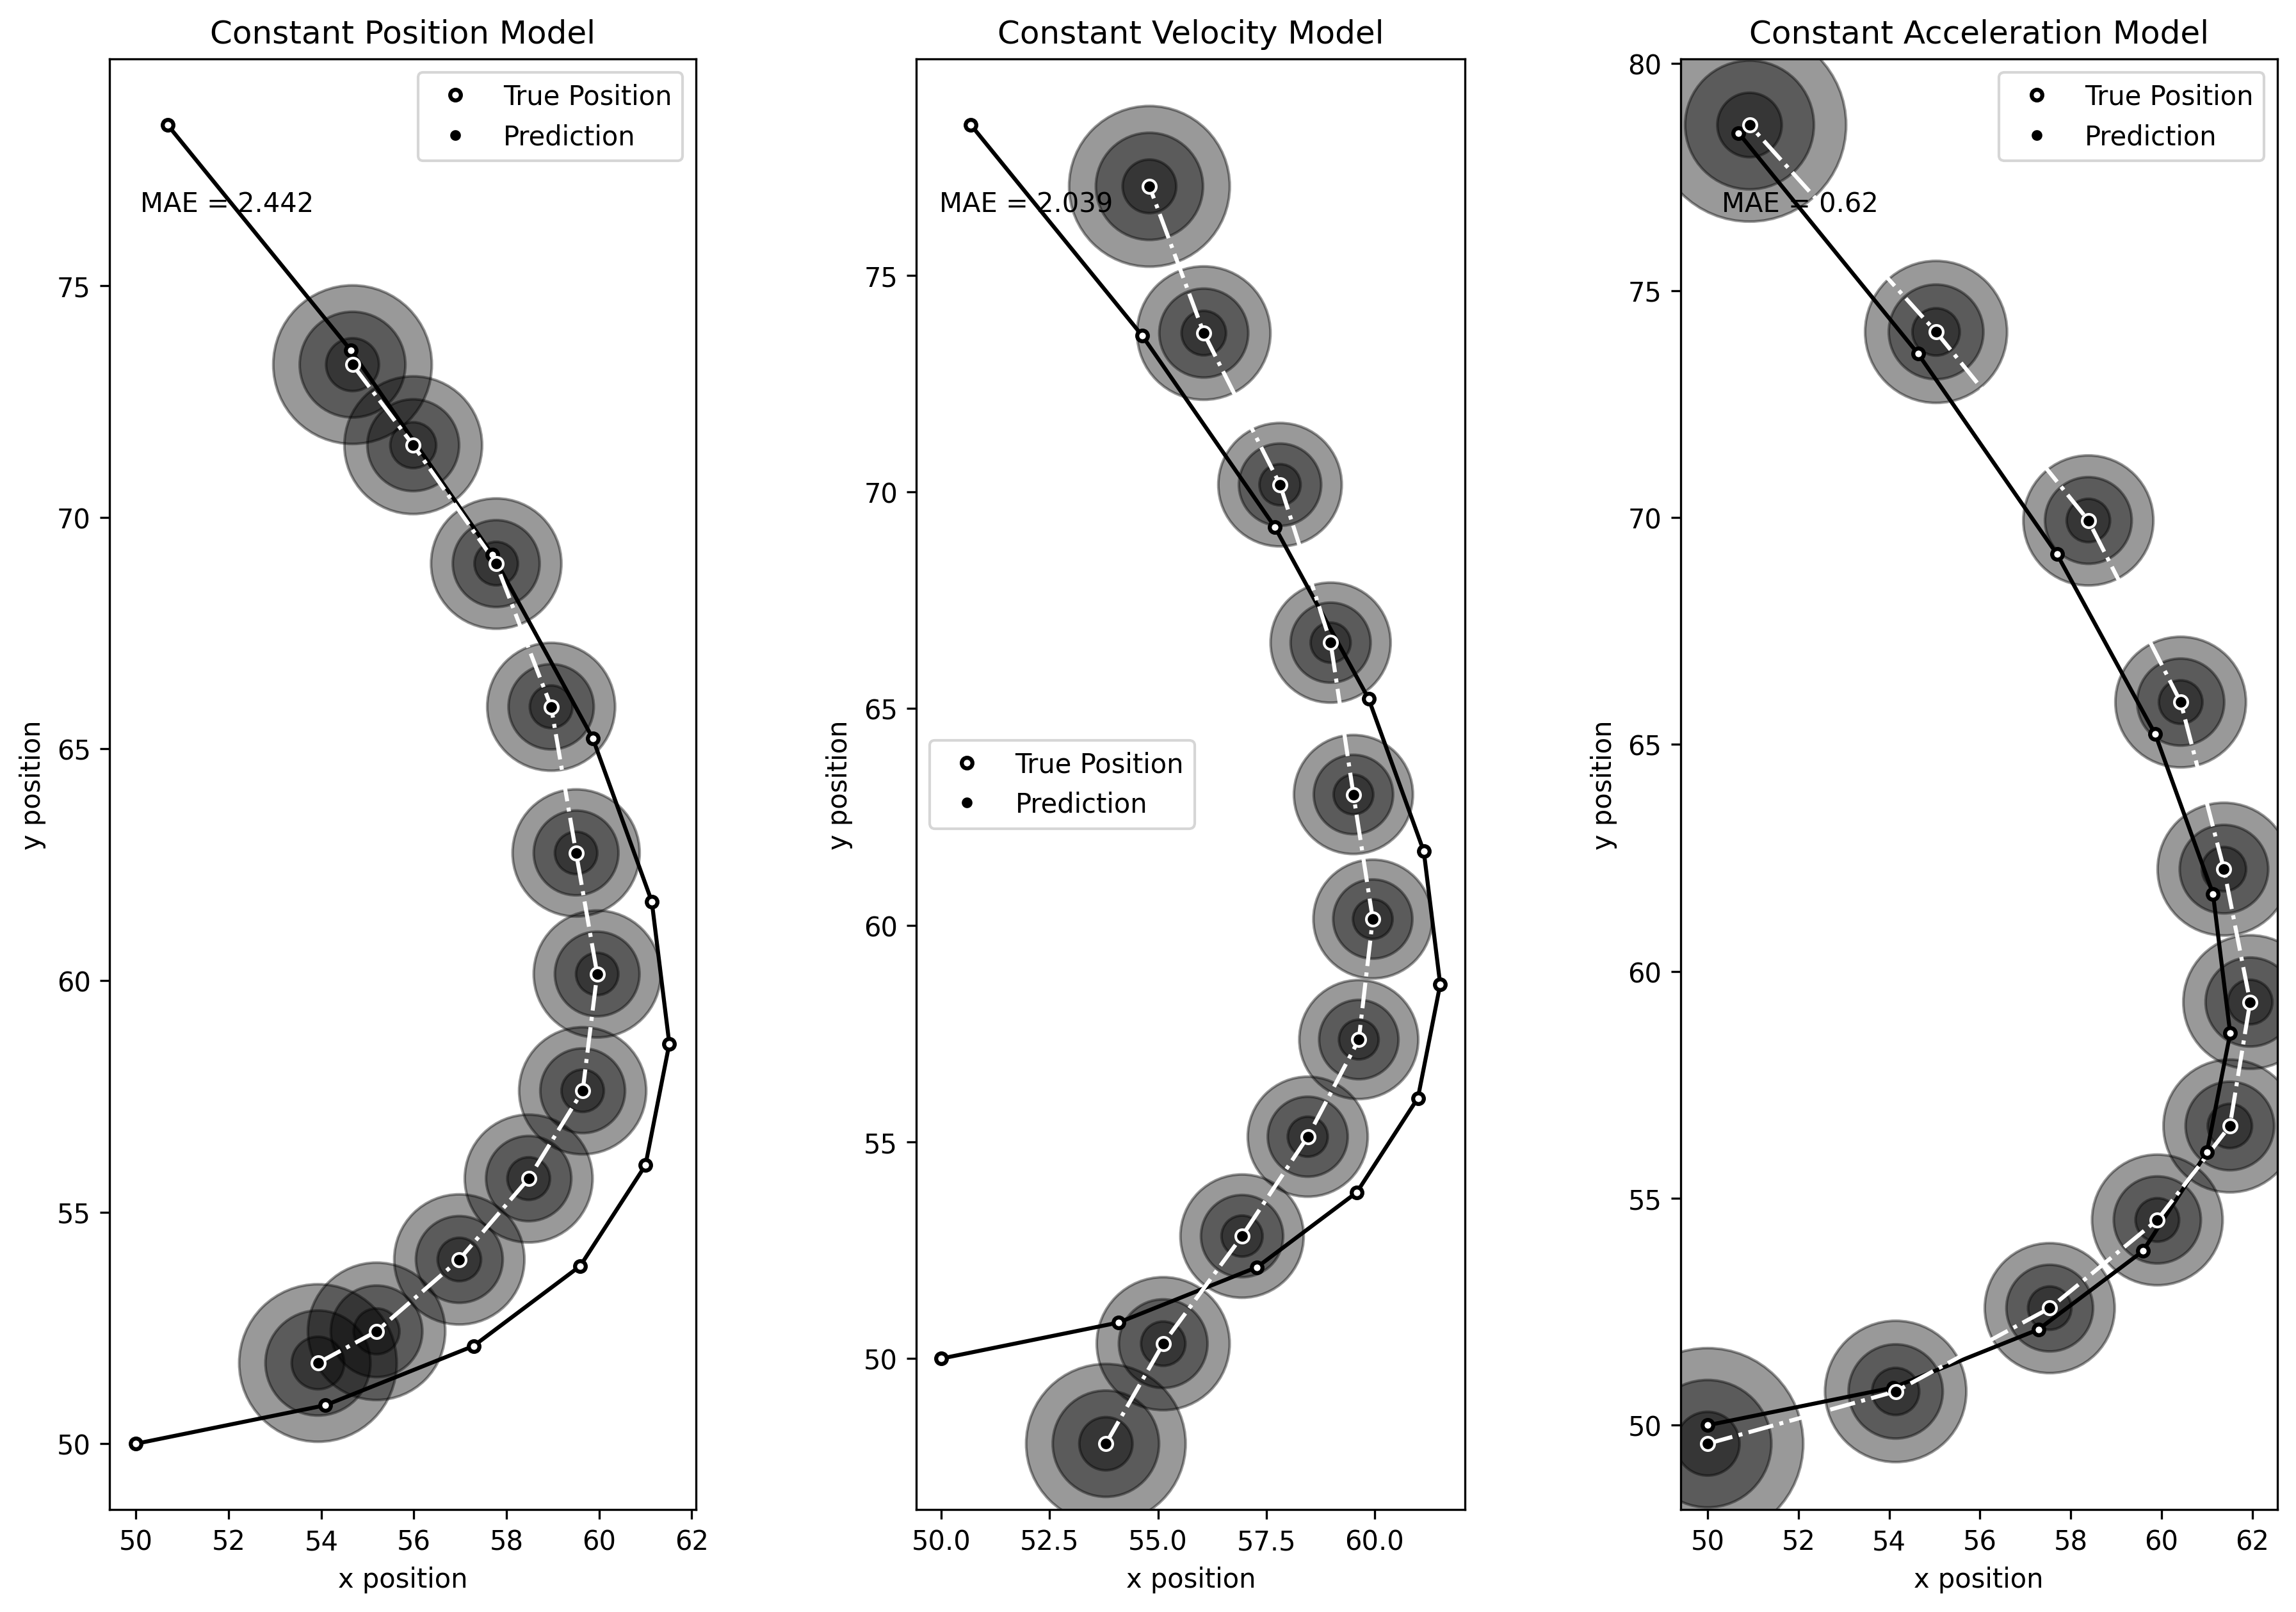

In [38]:
plt.rcParams["figure.figsize"] = (15,10)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_dpi(300)

subprocess.call(['./Ch1Demo','p'])
pred = [None,None,None,None]
with open('xPred.txt', 'r') as f:
    pred[0] = [float(x) for x in f.readline().split(",")]

with open('yPred.txt', 'r') as f:
    pred[1] = [float(y) for y in f.readline().split(",")]

with open('xCovPred.txt', 'r') as f:
    pred[2] = [np.sqrt(float(y)) for y in f.readline().split(",")]

with open('yCovPred.txt', 'r') as f:
    pred[3] = [np.sqrt(float(y)) for y in f.readline().split(",")]


for i in range(len(pred[0])):
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*pred[2][i], ellipseScaling*pred[3][i], alpha=0.4, color = 'black')
    ax1.add_artist(ellipse)
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*2*pred[2][i], ellipseScaling*2*pred[3][i], alpha=0.4, color = 'black')
    ax1.add_artist(ellipse)
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*3*pred[2][i], ellipseScaling*3*pred[3][i], alpha=0.4, color = 'black')
    ax1.add_artist(ellipse)

ax1.plot(o1.XPosList, o1.YPosList, 'black')
ax1.plot(pred[0], pred[1], 'white', linestyle='dashdot')

ax1.plot(o1.XPosList, o1.YPosList, '.', color='black', markersize=8, markerfacecolor='white',markeredgecolor='black',markeredgewidth=1.5, label='True Position')
ax1.plot(pred[0], pred[1], '.', color='white', markersize=10, markerfacecolor='black',markeredgecolor='white',markeredgewidth=1, label='Prediction')

ax1.set_title('Constant Position Model')
ax1.set_xlabel('x position')
ax1.set_ylabel('y position')
ax1.legend()

distError = 0
for point in range(len(pred[0])):
    dist = np.sqrt(np.power(o1.XPosList[point]-pred[0][point],2)+np.power(o1.YPosList[point]-pred[1][point],2))
    distError += dist
distError /= len(pred[0])

ax1.text(0.2, 0.9, 'MAE = ' + str(np.round(distError,3)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)

subprocess.call(['./Ch1Demo','v'])
pred = [None,None,None,None]
with open('xPred.txt', 'r') as f:
    pred[0] = [float(x) for x in f.readline().split(",")]

with open('yPred.txt', 'r') as f:
    pred[1] = [float(y) for y in f.readline().split(",")]

with open('xCovPred.txt', 'r') as f:
    pred[2] = [np.sqrt(float(y)) for y in f.readline().split(",")]

with open('yCovPred.txt', 'r') as f:
    pred[3] = [np.sqrt(float(y)) for y in f.readline().split(",")]


for i in range(len(pred[0])):
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*pred[2][i], ellipseScaling*pred[3][i], alpha=0.4, color = 'black')
    ax2.add_artist(ellipse)
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*2*pred[2][i], ellipseScaling*2*pred[3][i], alpha=0.4, color = 'black')
    ax2.add_artist(ellipse)
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*3*pred[2][i], ellipseScaling*3*pred[3][i], alpha=0.4, color = 'black')
    ax2.add_artist(ellipse)

ax2.plot(o1.XPosList, o1.YPosList, 'black')
ax2.plot(pred[0], pred[1], 'white', linestyle='dashdot')

ax2.plot(o1.XPosList, o1.YPosList, '.', color='black', markersize=8, markerfacecolor='white',markeredgecolor='black',markeredgewidth=1.5, label='True Position')
ax2.plot(pred[0], pred[1], '.', color='white', markersize=10, markerfacecolor='black',markeredgecolor='white',markeredgewidth=1, label='Prediction')

ax2.set_title('Constant Velocity Model')
ax2.set_xlabel('x position')
ax2.set_ylabel('y position')
ax2.legend()

distError = 0
for point in range(len(pred[0])):
    dist = np.sqrt(np.power(o1.XPosList[point]-pred[0][point],2)+np.power(o1.YPosList[point]-pred[1][point],2))
    distError += dist
distError /= len(pred[0])

ax2.text(0.2, 0.9, 'MAE = ' + str(np.round(distError,3)), horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)

subprocess.call(['./Ch1Demo','1'])
pred = [None,None,None,None]
with open('xPred.txt', 'r') as f:
    pred[0] = [float(x) for x in f.readline().split(",")]

with open('yPred.txt', 'r') as f:
    pred[1] = [float(y) for y in f.readline().split(",")]

with open('xCovPred.txt', 'r') as f:
    pred[2] = [np.sqrt(float(y)) for y in f.readline().split(",")]

with open('yCovPred.txt', 'r') as f:
    pred[3] = [np.sqrt(float(y)) for y in f.readline().split(",")]


for i in range(len(pred[0])):
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*pred[2][i], ellipseScaling*pred[3][i], alpha=0.4, color = 'black')
    ax3.add_artist(ellipse)
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*2*pred[2][i], ellipseScaling*2*pred[3][i], alpha=0.4, color = 'black')
    ax3.add_artist(ellipse)
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*3*pred[2][i], ellipseScaling*3*pred[3][i], alpha=0.4, color = 'black')
    ax3.add_artist(ellipse)

ax3.plot(o1.XPosList, o1.YPosList, 'black')
ax3.plot(pred[0], pred[1], 'white', linestyle='dashdot')

ax3.plot(o1.XPosList, o1.YPosList, '.', color='black', markersize=8, markerfacecolor='white',markeredgecolor='black',markeredgewidth=1.5, label='True Position')
ax3.plot(pred[0], pred[1], '.', color='white', markersize=10, markerfacecolor='black',markeredgecolor='white',markeredgewidth=1, label='Prediction')

ax3.set_title('Constant Acceleration Model')
ax3.set_xlabel('x position')
ax3.set_ylabel('y position')
ax3.legend()

distError = 0
for point in range(len(pred[0])):
    dist = np.sqrt(np.power(o1.XPosList[point]-pred[0][point],2)+np.power(o1.YPosList[point]-pred[1][point],2))
    distError += dist
distError /= len(pred[0])

ax3.text(0.2, 0.9, 'MAE = ' + str(np.round(distError,3)), horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes)


# ax1.set_xlim(31,53)
ax1.set_aspect('equal')
# ax1.set_ylim(2,53)
# ax2.set_xlim(31,53)
ax2.set_aspect('equal')
# ax2.set_ylim(2,53)
# ax3.set_xlim(31,53)
ax3.set_aspect('equal')
# ax3.set_ylim(2,53)


In [48]:
distErr = [0,0,0,0]

loopTotal = 500
for i in range(loopTotal):

    print(i)

    timesteps = 20+int(i/20)
    speed = 5+0.1*i
    accel = 1+0.01*i
    ellipseScaling = 1

    o1 = object("1", 50, 50)
    # o1.move(timesteps, speed)
    o1.curve(timesteps, speed, accel)
    meas = o1.measure()
    dir = [d*speed for d in o1.direction]
    with open('dir.txt', 'w') as f:
        f.write(str(dir))
    with open('Xpos.txt', 'w') as f:
        f.writelines(np.array2string(meas[0], separator=',', suppress_small=True))
    with open('Ypos.txt', 'w') as f:
        f.writelines(np.array2string(meas[1], separator=',', suppress_small=True))


    subprocess.call(['./Ch1Demo','p'])
    pred = [None,None,None,None]
    with open('xPred.txt', 'r') as f:
        pred[0] = [float(x) for x in f.readline().split(",")]
    with open('yPred.txt', 'r') as f:
        pred[1] = [float(y) for y in f.readline().split(",")]
    with open('xCovPred.txt', 'r') as f:
        pred[2] = [np.sqrt(float(y)) for y in f.readline().split(",")]
    with open('yCovPred.txt', 'r') as f:
        pred[3] = [np.sqrt(float(y)) for y in f.readline().split(",")]

    distError = 0
    for point in range(len(pred[0])):
        dist = np.sqrt(np.power(o1.XPosList[point]-pred[0][point],2)+np.power(o1.YPosList[point]-pred[1][point],2))
        distError += dist
    distError /= len(pred[0])
    distErr[0] += distError


    subprocess.call(['./Ch1Demo','v'])
    pred = [None,None,None,None]
    with open('xPred.txt', 'r') as f:
        pred[0] = [float(x) for x in f.readline().split(",")]
    with open('yPred.txt', 'r') as f:
        pred[1] = [float(y) for y in f.readline().split(",")]
    with open('xCovPred.txt', 'r') as f:
        pred[2] = [np.sqrt(float(y)) for y in f.readline().split(",")]
    with open('yCovPred.txt', 'r') as f:
        pred[3] = [np.sqrt(float(y)) for y in f.readline().split(",")]

    distError = 0
    for point in range(len(pred[0])):
        dist = np.sqrt(np.power(o1.XPosList[point]-pred[0][point],2)+np.power(o1.YPosList[point]-pred[1][point],2))
        distError += dist
    distError /= len(pred[0])
    distErr[1] += distError

    subprocess.call(['./Ch1Demo','1'])
    pred = [None,None,None,None]
    with open('xPred.txt', 'r') as f:
        pred[0] = [float(x) for x in f.readline().split(",")]
    with open('yPred.txt', 'r') as f:
        pred[1] = [float(y) for y in f.readline().split(",")]
    with open('xCovPred.txt', 'r') as f:
        pred[2] = [np.sqrt(float(y)) for y in f.readline().split(",")]
    with open('yCovPred.txt', 'r') as f:
        pred[3] = [np.sqrt(float(y)) for y in f.readline().split(",")]

    distError = 0
    for point in range(len(pred[0])):
        dist = np.sqrt(np.power(o1.XPosList[point]-pred[0][point],2)+np.power(o1.YPosList[point]-pred[1][point],2))
        distError += dist
    distError /= len(pred[0])
    distErr[2] += distError

    distError = 0
    for point in range(len(pred[0])):
        dist = np.sqrt(np.power(meas[0][point]-pred[0][point],2)+np.power(meas[1][point]-pred[1][point],2))
        distError += dist
    distError /= len(pred[0])
    distErr[3] += distError

print(distErr[0]/loopTotal)
print(distErr[1]/loopTotal)
print(distErr[2]/loopTotal)
print(distErr[3]/loopTotal)

0
start x parse
end x parse
start Y parse
end y parse
completed construction 
completed forward messages
completed back messages
start x parse
end x parse
start Y parse
end y parse
completed construction 
completed forward messages
completed back messages
start x parse
end x parse
start Y parse
end y parse
completed construction 
completed forward messages
completed back messages
1
start x parse
end x parse
start Y parse
end y parse
completed construction 
completed forward messages
completed back messages
start x parse
end x parse
start Y parse
end y parse
completed construction 
completed forward messages
completed back messages
start x parse
end x parse
start Y parse
end y parse
completed construction 
completed forward messages
completed back messages
2
start x parse
end x parse
start Y parse
end y parse
completed construction 
completed forward messages
completed back messages
start x parse
end x parse
start Y parse
end y parse
completed construction 
completed forward messages
co

In [44]:
print(round(distErr[0]/loopTotal,4))
print(round(distErr[1]/loopTotal,4))
print(round(distErr[2]/loopTotal,4))

1.6258
0.528
0.5523
